# 4. Image denoising

The “Noisy.raw” is adopted in the following denoising tasks. 

Please select one of the “statistic-order filters” to filter the noisy image and show the visualized results

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [34]:
imgData = np.fromfile('data/Noisy.raw', dtype='uint8')

In [35]:
def raw_read(imgData):
    nr = 512
    nc = 512
    nchan = 1
    c = 0 #用 c來記錄 raw檔讀取到的 index位置
    img = np.zeros((nr, nc, nchan))
    for i in range(nr):
        for j in range(nc):
            for k in range(0, nchan):
                img[i, j, k] = imgData[c]
                c=c+1
    return img

In [36]:
img_Noisy = raw_read(imgData)

# show image

In [40]:
def imshow(img):
    if len(img.shape) < 3:
        plt.imshow(img, cmap="gray")
    elif img.shape[2] == 1:
        plt.imshow(np.resize(img,(img.shape[0],img.shape[1])), cmap="gray")
    else:
        plt.imshow(img)

# median filter

In [37]:
def medianfilter(img, ksize):
    temp = []
    adj = ksize//2
    imgfinal = []
    imgfinal = np.zeros([512, 512])
    
    for i in range(512):
        for j in range(512):
            
            for k in range(ksize):
                if i + k - adj <0 or i+k-adj >len(img)-1:
                    for l in range(ksize):
                        temp.append(0)
                else:
                    if j + k - adj <0 or j+adj > len(img[0])-1:
                        temp.append(0)
                    else:
                        for m in range(ksize):
                            temp.append(img[i + k - adj][j + m - adj])
            temp.sort()
            imgfinal[i,j] = temp[len(temp)//2]
            temp = []
    return imgfinal             

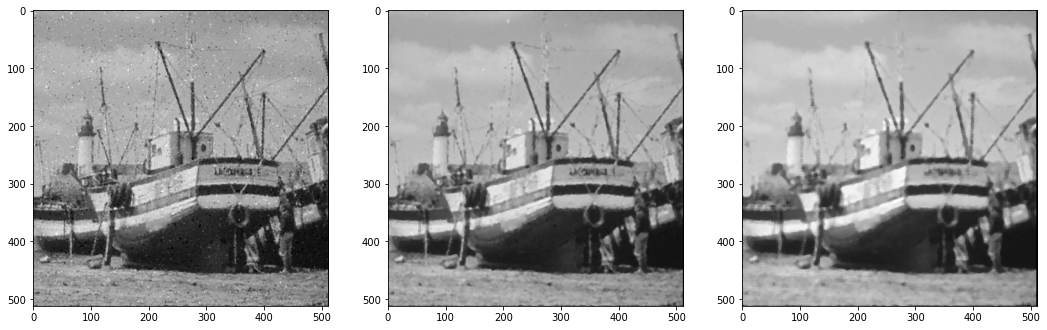

In [38]:
img_3 = medianfilter(img_Noisy, 3)
img_5 = medianfilter(img_Noisy, 5)
img_7 = medianfilter(img_Noisy, 7)

images = [img_3, img_5, img_7]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 18))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p, cmap='gray')
plt.show()